In [2]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

data_folder_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, "data_folder"))
sys.path.append(data_folder_path) 

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import concurrent.futures
plt.rcParams.update({'font.size': 12})

np.set_printoptions(precision=5, suppress=True, linewidth=100)


<Token var=<ContextVar name='format_options' default={'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': 9223372036854775807, 'override_repr': None} at 0x000001EC621B9EE0> at 0x000001EC7A6EEB40>

In [3]:
N = 3
M = 3
V = 1

states, formatted_states = enumerate_states(N, M)

Js = np.linspace(0,2,100)
mus = np.linspace(0,5,100)

In [33]:
energies = []
for mu in mus:
    H = construct_hamiltonian(N, M, V, mu, J = 0, chemical_potential_loc = 1)
    eigenvalues, eigenvectors = exact_diagonalize(H)
    energies += [eigenvalues]

energies = np.array(energies)

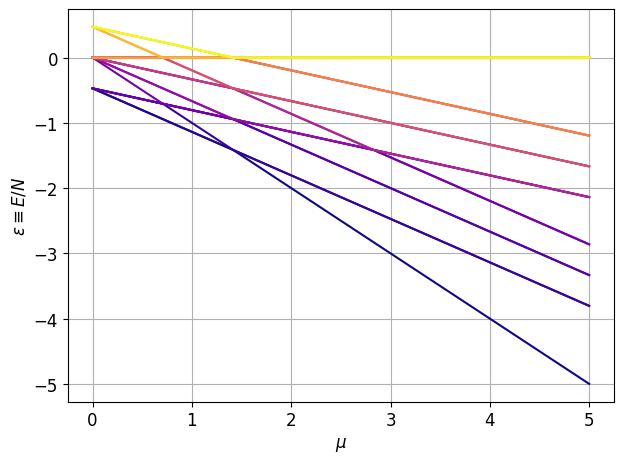

In [47]:
fig, ax = plt.subplots()
colors = plt.get_cmap("plasma", len(eigenvalues))
for i in range(len(eigenvalues)):
    ax.plot(mus, energies[:,i]/N, color = colors(i))

ax.set_xlabel("$\mu$")
ax.set_ylabel("$\epsilon \equiv E/N$")

plt.grid()
plt.tight_layout()

In [ ]:
H = construct_hamiltonian(N, M, V = 1, mu = 1.4, J = 0, chemical_potential_loc = 1)

energy, eigenvector = exact_diagonalize(H)
ground_state = eigenvector[0]

for i in range(M**N):
    if ground_state[i] != 0:
        print(f"{ground_state[i]}: {formatted_states[i]}")

(0.016240376676315005+0j): |0,0,0>
(0.1842440572748947+0j): |0,0,1>
(0.08199631940142083+0j): |0,0,2>
(-0.29550452425305207+0j): |0,1,0>
(-0.22974858152794655+0j): |0,1,1>
(5.2582148885120315e-18+0j): |0,1,2>
(-0.14775226212652562+0j): |0,2,0>
(-0.18424405727489485+0j): |0,2,1>
(-0.08199631940142048+0j): |0,2,2>
(0.1842440572748948+0j): |1,0,0>
(0.3684881145497892+0j): |1,0,1>
(0.18424405727489435+0j): |1,0,2>
(-0.22974858152794628+0j): |1,1,0>
(6.602758100828189e-17+0j): |1,1,1>
(0.2297485815279464+0j): |1,1,2>
(-0.18424405727489457+0j): |1,2,0>
(-0.36848811454978886+0j): |1,2,1>
(-0.18424405727489435+0j): |1,2,2>
(0.0819963194014207+0j): |2,0,0>
(0.18424405727489448+0j): |2,0,1>
(0.14775226212652579+0j): |2,0,2>
(-1.249000902703301e-16+0j): |2,1,0>
(0.2297485815279464+0j): |2,1,1>
(0.2955045242530515+0j): |2,1,2>
(-0.0819963194014205+0j): |2,2,0>
(-0.1842440572748943+0j): |2,2,1>
(-0.01624037667631484+0j): |2,2,2>


In [57]:
large_chem_pot_H = construct_hamiltonian(N, M, V = 0, mu = 1, J = 0, chemical_potential_loc = 1)
_, eigenvectors = exact_diagonalize(large_chem_pot_H)

state = eigenvectors[0]
for i in range(M**N):
    if state[i] != 0:
        print(f"{state[i]}: {formatted_states[i]}")

(1+0j): |1,1,1>


In [ ]:
large_chem_pot_H = construct_hamiltonian(N, M, V = 0, mu = 1, J = 0, chemical_potential_loc = 1)
_, eigenvectors = exact_diagonalize(large_chem_pot_H)

state = eigenvectors[0]
for i in range(M**N):
    if state[i] != 0:
        print(f"{state[i]}: {formatted_states[i]}")

state_energies = []
for mu in mus:
    H = construct_hamiltonian(N, M, V, mu, J = 0, chemical_potential_loc = 1)
    exp_value = state.conj().T @ H @ state
    state_energies += [exp_value]

state_energies = np.array(state_energies)

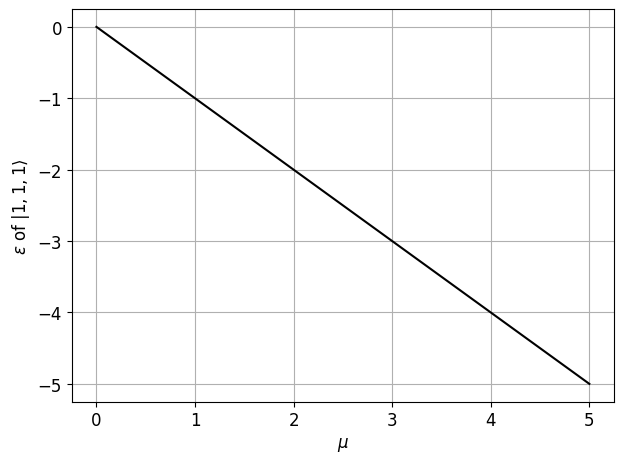

In [61]:
fig, ax = plt.subplots()

ax.plot(mus, state_energies/N, "k")

ax.set_xlabel("$\mu$")
ax.set_ylabel(r"$\epsilon$ of $|1,1,1\rangle$")

plt.grid()
plt.tight_layout()

In [62]:
state_energies = []
residual_norms = []

for mu in mus:
    H = construct_hamiltonian(N, M, V, mu, J=0, chemical_potential_loc=1)
    
    # Apply H to the state
    Hpsi = H @ state
    lambda_ = state.conj().T @ Hpsi
    
    # Check if Hψ ≈ λψ
    residual = Hpsi - lambda_ * state
    residual_norm = np.linalg.norm(residual)
    residual_norms.append(residual_norm)
    
    # Save energy if it's approximately an eigenstate
    if residual_norm < 1e-10:
        state_energies.append(lambda_.real)  # Only real part for safety
    else:
        state_energies.append(np.nan)  # Not an eigenstate ⇒ skip in plot

state_energies = np.array(state_energies)


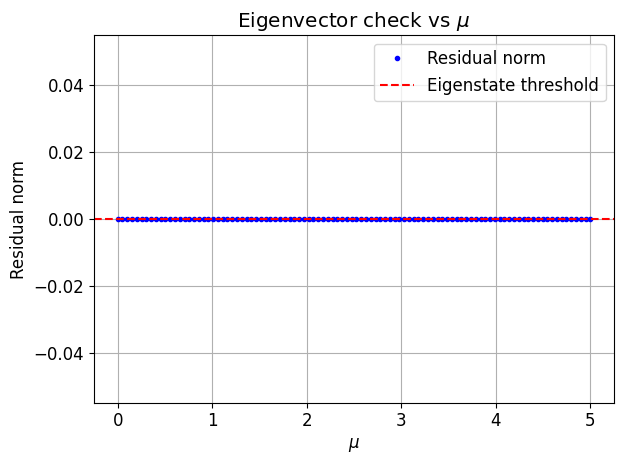

In [65]:
plt.figure()
plt.plot(mus, residual_norms, ".b" , label="Residual norm")
plt.axhline(1e-10, ls='--', color='red', label="Eigenstate threshold")
plt.xlabel("$\mu$")
plt.ylabel("Residual norm")
plt.title("Eigenvector check vs $\mu$")
plt.grid()
plt.legend()
plt.tight_layout()
